In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

### Données


In [2]:
df_chauffage = pd.read_csv('data/df_chauffage.csv', delimiter = ';')
df_chauffage

,Compacite,Superficie,SurfaceMur,SurfaceToit,Hauteur,Orientation,SurfaceVitree,RepartitionVitres,Chauffage
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In [6]:
#Mélange des lignes et séparation des classes des données
df_chauffage = df_chauffage.sample(frac=1).reset_index(drop=True)
data = df_chauffage.drop('Chauffage', axis=1)
y = df_chauffage['Chauffage']



#Division entre données d'apprentissage (70%) et de test (30%) 
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3)


### Sélection des features

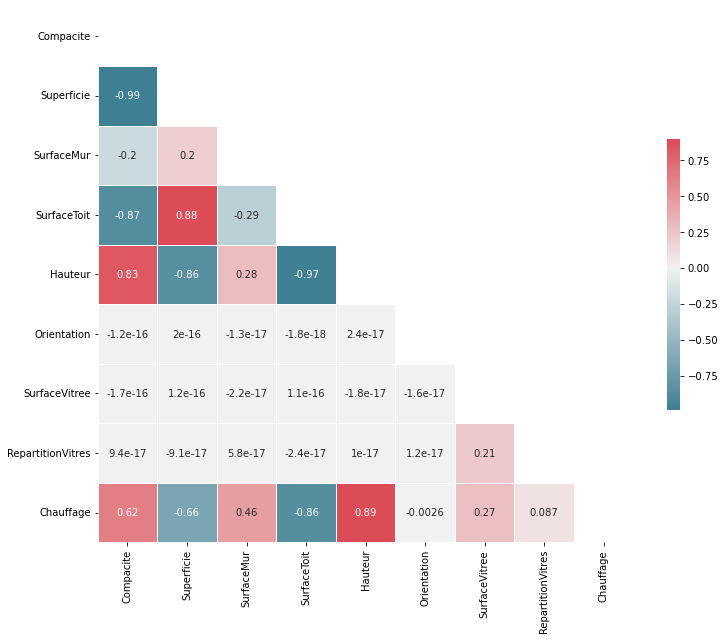

In [22]:
corr = df_chauffage.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5})
plt.show()

In [15]:
def VIF(df):
    vif = pd.DataFrame()
    vif['feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, col) for col in range(len(df.columns))]
    return vif

vif_df = VIF(df_chauffage).sort_values('VIF', ascending = False, ignore_index = True)
print(vif_df)

X_train.drop('Compacite',1)
X_test.drop('Compacite',1)

             feature         VIF
0         Superficie         inf
1         SurfaceMur         inf
2        SurfaceToit         inf
3            Hauteur  232.354620
4          Compacite  196.309263
5          Chauffage   68.576868
6        Orientation   10.797122
7      SurfaceVitree    7.606252
8  RepartitionVitres    4.546543


R:\Conda\envs\DataScience\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Louis\AppData\Local\Temp/ipykernel_3036/3295387652.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train.drop('Compacite',1)
C:\Users\Louis\AppData\Local\Temp/ipykernel_3036/3295387652.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test.drop('Compacite',1)


,Superficie,SurfaceMur,SurfaceToit,Hauteur,Orientation,SurfaceVitree,RepartitionVitres
649,588.0,294.0,147.0,7.0,3,0.25,1
185,588.0,294.0,147.0,7.0,4,0.25,4
444,686.0,245.0,220.5,3.5,4,0.10,3
585,661.5,416.5,122.5,7.0,2,0.10,5
299,637.0,343.0,147.0,7.0,3,0.10,1
...,...,...,...,...,...,...,...
707,686.0,245.0,220.5,3.5,3,0.10,2
412,710.5,269.5,220.5,3.5,5,0.40,5
324,612.5,318.5,147.0,7.0,4,0.25,5
28,637.0,343.0,147.0,7.0,2,0.25,1


### Regression Linéaire
Dans le cas d'une régression linéaire, il est presque impossible de trouver la valeur exacte. On va donc plutôt regarder à quel point la valeur trouvée est proche de la valeur original.
Dans notre cas, nous allons utiliser  :
- **le Coefficient de détermination** (r²)qui mesure la qualité de la régression
- **l'Erreur quadratique moyenne** (MSE) qui mesure la précision de la régression

In [17]:
def testLinearRegression(model, data, y, info):
    y_predict = model.predict(data)
    rmse = (np.sqrt(mean_squared_error(y, y_predict)))
    r2 = r2_score(y, y_predict)

    print('La performance du modèle {}'.format(info))
    print('--------------------------------------')
    print('L\'erreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    print('\n')
    
    f, ax1 = plt.subplots(1, 1, sharey=True)
    ax1.plot(range(0,len(data)),y.iloc[:],'o',color='red',label = 'Actual Values')
    ax1.plot(range(0,len(data)),y_predict[:],'X',color='yellow',label = 'Predicted Values')
    ax1.set_xlabel('Cas {}'.format(info))
    ax1.set_ylabel('Chauffage')
    ax1.legend(loc = 'upper right')
    
    plt.show()

La performance du modèle d'entrainement
--------------------------------------
L'erreur quadratique moyenne est 2.8650184724401737
le score R2 est 0.9193836201987066




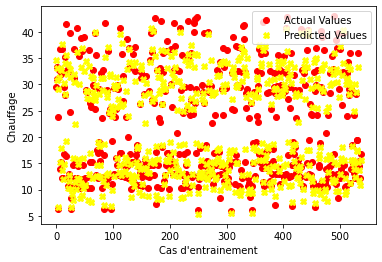

La performance du modèle de test
--------------------------------------
L'erreur quadratique moyenne est 3.055558223842317
le score R2 est 0.9073781874317928




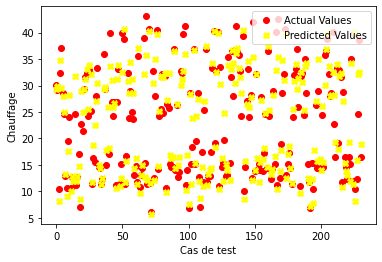

In [18]:
reg = LinearRegression()
model = reg.fit(X_train, Y_train)
 
testLinearRegression(model, X_train, Y_train, 'd\'entrainement')
testLinearRegression(model, X_test, Y_test, 'de test')

### Régression polynomial

Nous allons aussi tester la régression polynomial pour voir si un polynome approxime mieux les données. Nous cherchons en premier à trouver le degré du polynome qui maximise le résultat pour le jeu de test.

La performance du modèle d'entrainement
--------------------------------------
L'erreur quadratique moyenne est 0.2509176748094296
le score R2 est 0.9993816548660567




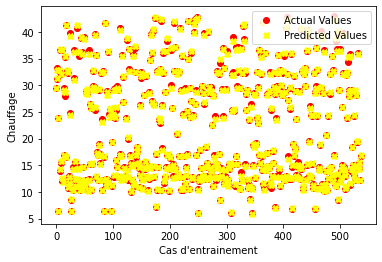

La performance du modèle de test
--------------------------------------
L'erreur quadratique moyenne est 0.05651999399182485
le score R2 est 0.9999683089694257




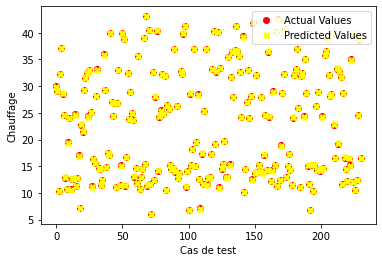

In [20]:
erreur_test = float('inf')
score_test = 0
i_test = 0

model = LinearRegression()

for i in range(1,10):
    polynomial_features= PolynomialFeatures(degree=i)
    
    data_poly_test = polynomial_features.fit_transform(X_test)
    model.fit(data_poly_test, Y_test)
    
    y_predict = model.predict(data_poly_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_predict)))
    r2 = r2_score(Y_test, y_predict)
    
    if(rmse < erreur_test and r2 > score_test ):
        erreur_test = rmse
        score_test = r2
        i_test = i
        

polynomial_features= PolynomialFeatures(degree=i_test)
    
data_poly_train = polynomial_features.fit_transform(X_train)
model.fit(data_poly_train, Y_train)
testLinearRegression(model, data_poly_train, Y_train, 'd\'entrainement')

data_poly_test = polynomial_features.fit_transform(X_test)
model.fit(data_poly_test, Y_test)
testLinearRegression(model, data_poly_test, Y_test, 'de test')

### Régression par Arbre de décision

La performance du modèle d'entrainement
--------------------------------------
L'erreur quadratique moyenne est 1.327711439017662e-16
le score R2 est 1.0




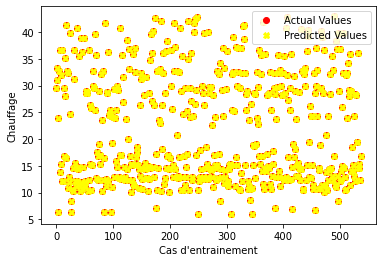

La performance du modèle de test
--------------------------------------
L'erreur quadratique moyenne est 0.5538167449734497
le score R2 est 0.9969572637123045




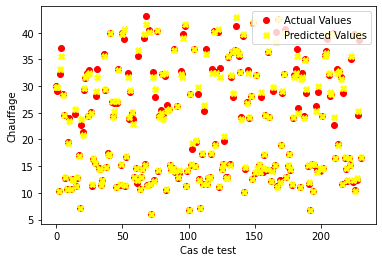

In [21]:
dt_model = DecisionTreeRegressor(random_state=123)
model = dt_model.fit(X_train, Y_train)

testLinearRegression(model, X_train, Y_train, 'd\'entrainement')
testLinearRegression(model, X_test, Y_test, 'de test')

### Régression par Random Forest

La performance du modèle d'entrainement
--------------------------------------
L'erreur quadratique moyenne est 0.1988417027588843
le score R2 est 0.9996127460495623




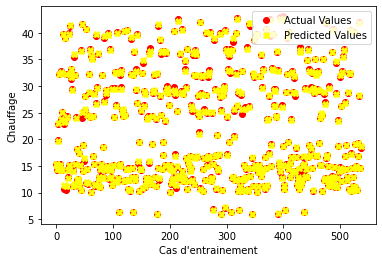

La performance du modèle de test
--------------------------------------
L'erreur quadratique moyenne est 0.6464832742251044
le score R2 est 0.9958478434251744




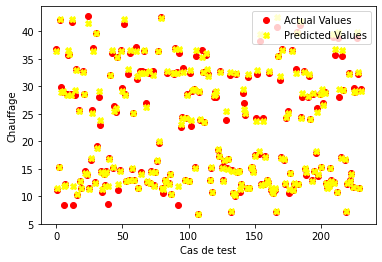

In [155]:
rf_model = RandomForestRegressor(random_state=123)
model = rf_model.fit(X_train, Y_train)

testLinearRegression(model, X_train, Y_train, 'd\'entrainement')
testLinearRegression(model, X_test, Y_test, 'de test')

### Perceptron Multi-couche

La performance du modèle d'entrainement
--------------------------------------
L'erreur quadratique moyenne est 3.3865365034962993
le score R2 est 0.8876708604443062




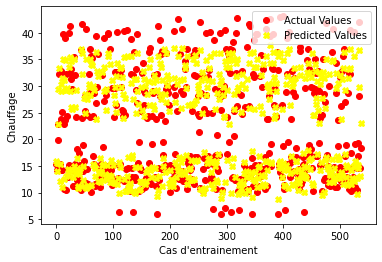

La performance du modèle de test
--------------------------------------
L'erreur quadratique moyenne est 3.1907463691814866
le score R2 est 0.8988551667208315




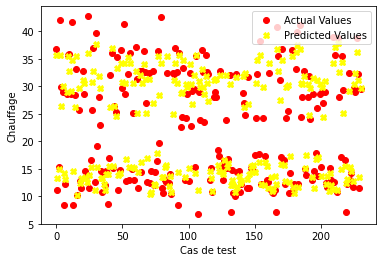

In [167]:
MLP = MLPRegressor(activation='relu',alpha = 0.00001, batch_size='auto', max_iter=100000, beta_1 = 0.9)
model = MLP.fit(X_train, Y_train)

testLinearRegression(model, X_train, Y_train, 'd\'entrainement')
testLinearRegression(model, X_test, Y_test, 'de test')